**Problem: Logistic Regression and Linear Discriminant Analysis(LDA)**

You are hired by a sports analysis agency to understand the selection process of high school football players into college with a full or partial scholarship. You are provided details of 6215 high school graduates who have been inducted into 4-year degree colleges with either full or partial scholarships.  You have to help the agency in predicting whether a high school graduate will win a full scholarship on the basis of the information given in the data set. Also, find out the important factors which are instrumental in winning a full scholarship in colleges.

Dataset for Problem: **Football Scholarship.csv**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sm

from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.metrics import accuracy_score , confusion_matrix


**SOLUTION**

The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, especially identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have a symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. For this is a classification problem, the dependence of the response on the predictors needs to be investigated.
Two different classification techniques are to be applied. However, the EDA part remains the same for both of them.
For easier interpretation of the models, later on, it may be better to code Full = 1 and Partial = 0. You may assume the opposite, but then you have to be very careful about the interpretation of the logistic model coefficients later.

In [2]:
df = pd.read_csv('Football+Scholarship.csv')
df.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,A,0.45,8.8,Eastern,Partial
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,Partial
3,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial
4,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial


**Shape of Data**

In [3]:
df.shape

(6215, 9)

**Information on the datatypes**

In [4]:
print(df.info(),'\n')
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 9 columns):
Academic_Score         6215 non-null float64
Score_on_Plays_Made    6215 non-null float64
Missed_Play_Score      6215 non-null float64
Injury_Propensity      6215 non-null object
School_Type            6215 non-null object
School_Score           6215 non-null float64
Overall_Score          6215 non-null float64
Region                 6215 non-null object
Scholarship            6215 non-null object
dtypes: float64(5), object(4)
memory usage: 437.1+ KB
None 

Academic_Score         float64
Score_on_Plays_Made    float64
Missed_Play_Score      float64
Injury_Propensity       object
School_Type             object
School_Score           float64
Overall_Score          float64
Region                  object
Scholarship             object
dtype: object


**5 point summary of the numeric columns in the data**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Academic_Score,6215.0,7.219252,1.292237,3.80,6.40,7.00,7.70,15.90
Score_on_Plays_Made,6215.0,0.337338,0.160122,0.08,0.23,0.29,0.40,1.33
Missed_Play_Score,6215.0,0.319537,0.145153,0.00,0.25,0.31,0.39,1.66
School_Score,6215.0,0.531448,0.147245,0.22,0.43,0.51,0.60,1.98
Overall_Score,6215.0,10.456771,1.172504,8.00,9.50,10.20,11.30,14.90


**5 point summary of the  obeject columns in the data**

In [6]:
df.describe(include=[np.object]).T

,count,unique,top,freq
Injury_Propensity,6215,4,Low,2650
School_Type,6215,4,C,3384
Region,6215,3,Eastern,2835
Scholarship,6215,2,Partial,4028


**Checking for Duplicates and if they need to be dropped.**

In [7]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 947
(6215, 9)


In [8]:
print(df[df.duplicated()]['Scholarship'].value_counts())
print(df[df.duplicated()]['Scholarship'].value_counts(normalize=True)*100)
print('\n')

Partial    691
Full       256
Name: Scholarship, dtype: int64
Partial    72.967265
Full       27.032735
Name: Scholarship, dtype: float64




In [9]:
947/6215 *100

15.237329042638779

In [10]:
#df.drop_duplicates(inplace = True)

In [11]:
#dups = df.duplicated()
#print('Number of duplicate rows = %d' % (dups.sum()))
#print(df.shape)

**Inference -** 947 duplicates havent been dropped for model building. The logic used is there is no unique identifier to distinguish if these records are duplicates, since this is an academic dataset there is very much a possibility of the records being similar.


**Checking for Missing Values**

In [12]:
df.isna().sum()

Academic_Score         0
Score_on_Plays_Made    0
Missed_Play_Score      0
Injury_Propensity      0
School_Type            0
School_Score           0
Overall_Score          0
Region                 0
Scholarship            0
dtype: int64

**Getting the value count for all variables with datatype object.**

In [13]:
for feature in df.columns:
    if df[feature].dtype=='object':
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Injury_Propensity
Low         2650
Normal      1319
High        1181
Moderate    1065
Name: Injury_Propensity, dtype: int64


School_Type
C    3384
B    1620
D    1042
A     169
Name: School_Type, dtype: int64


Region
Eastern     2835
Western     1724
Southern    1656
Name: Region, dtype: int64


Scholarship
Partial    4028
Full       2187
Name: Scholarship, dtype: int64




In [14]:
from pylab import rcParams

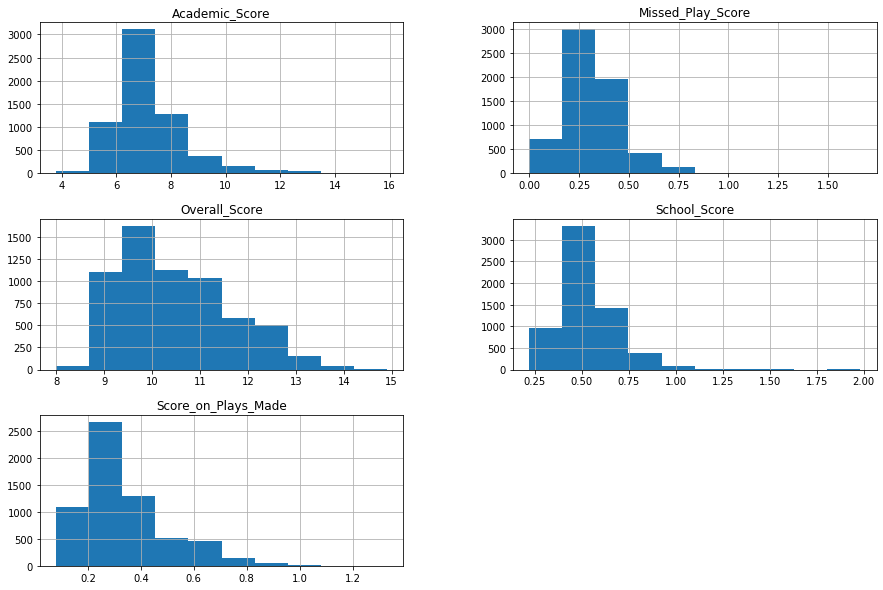

In [15]:
rcParams['figure.figsize'] = 15,10
df.hist();

In [16]:
df.skew()

Academic_Score         1.750576
Score_on_Plays_Made    1.405692
Missed_Play_Score      0.492118
School_Score           1.733181
Overall_Score          0.601023
dtype: float64

In [17]:
df.median()

Academic_Score          7.00
Score_on_Plays_Made     0.29
Missed_Play_Score       0.31
School_Score            0.51
Overall_Score          10.20
dtype: float64

* The histograms indicate a right skeweness for all the numeric variables.
* The .skew() function indicates a positive skeweness for all the variables.
* The median values and the skewness values for the data also indicate that the data is not normally disributed.

**Checking Distribution of the contunious variables and outliers in the data using the Box and Whiskers Plot**

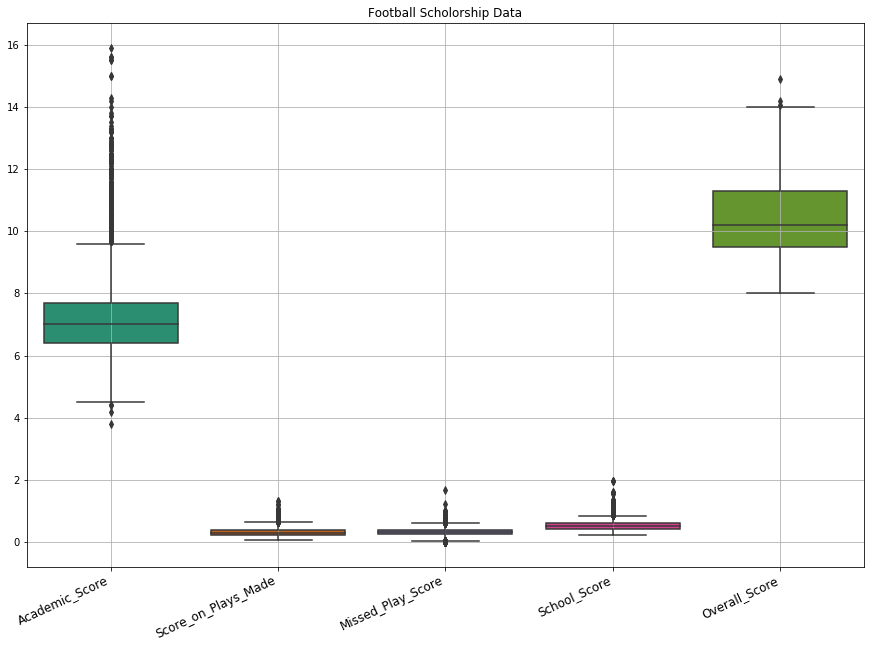

In [18]:
plt.figure(figsize=(15,10))

chart=sns.boxplot(data=df, palette="Dark2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=25, horizontalalignment='right', fontsize=12)
plt.title('Football Scholorship Data')
plt.grid()
chart;

In [19]:
# # Defining a function for getting the Upper and Lower limt acceptance of the outliers at 1.5*IQR. 
# # We can choose to treat the outliers at 3*IQR as well

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
## This is a loop to treat outliers for all the non-'object' type varible

for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

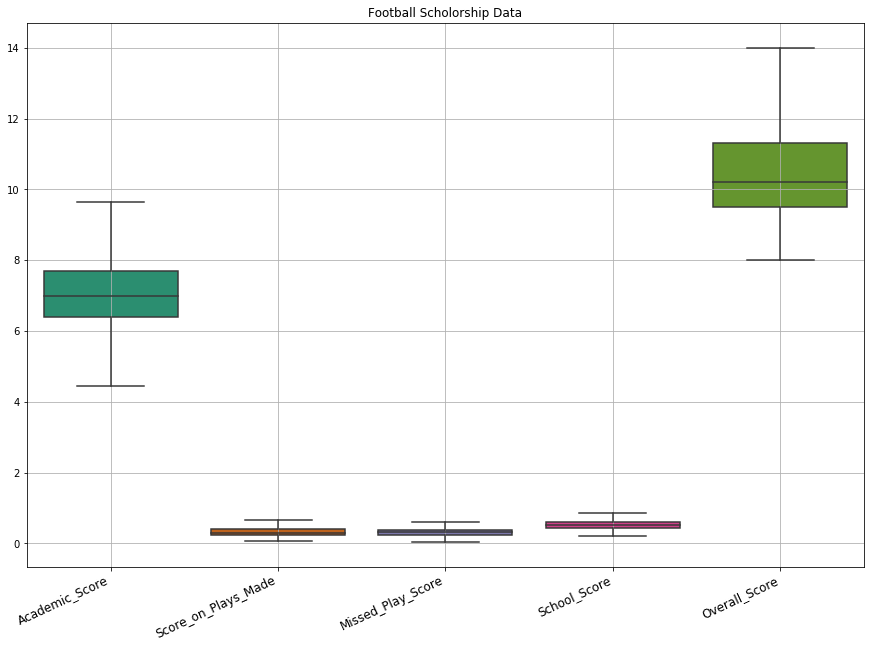

In [21]:
plt.figure(figsize=(15,10))

chart=sns.boxplot(data=df, palette="Dark2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=25, horizontalalignment='right', fontsize=12)
plt.title('Football Scholorship Data')
plt.grid()
chart;

In [22]:
df.corr()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score
Academic_Score,1.000000,0.238131,0.303391,0.288296,-0.099701
Score_on_Plays_Made,0.238131,1.000000,-0.381824,0.256837,-0.040141
Missed_Play_Score,0.303391,-0.381824,1.000000,0.045535,-0.010322
School_Score,0.288296,0.256837,0.045535,1.000000,0.013321
Overall_Score,-0.099701,-0.040141,-0.010322,0.013321,1.000000


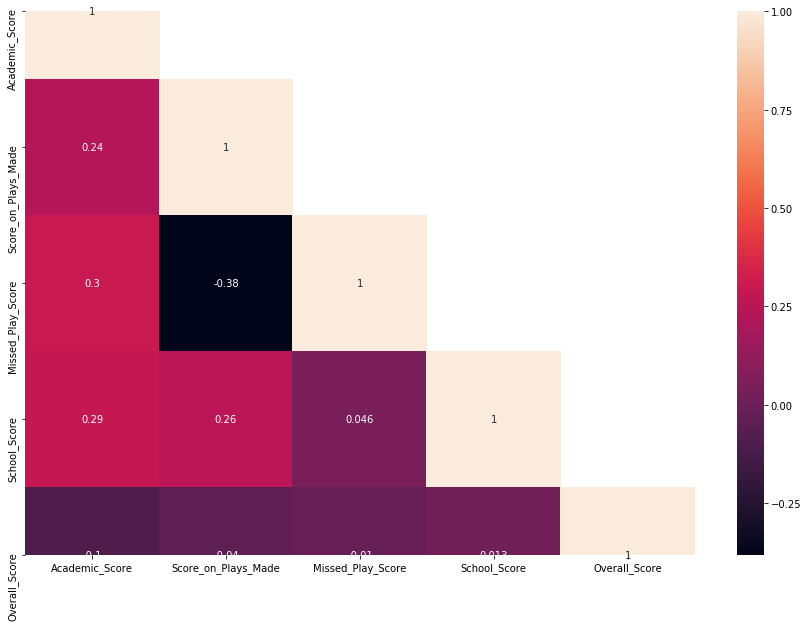

In [23]:
sns.heatmap(df.corr(),annot = True , mask = np.triu(df.corr(),+1))

**Scatter plot of the contunious independent variables with the traget variable as hue.**

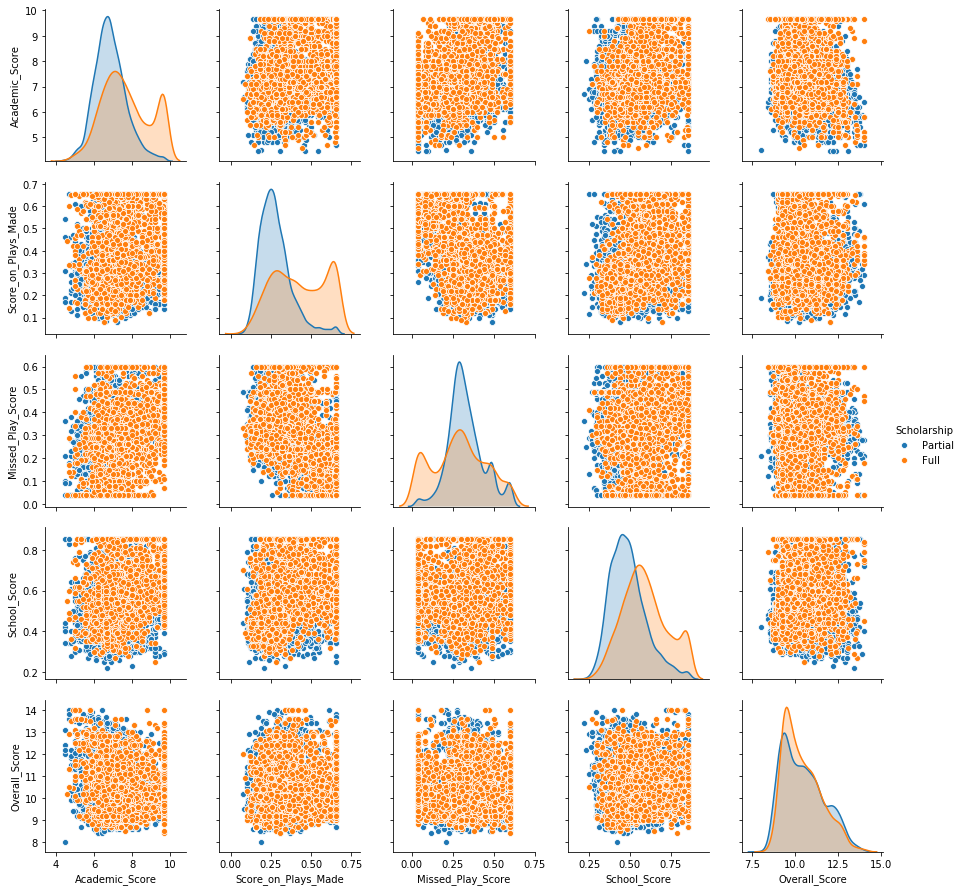

In [24]:
sns.pairplot(df, diag_kind = 'kde' , hue = 'Scholarship')

# Univariate Analysis

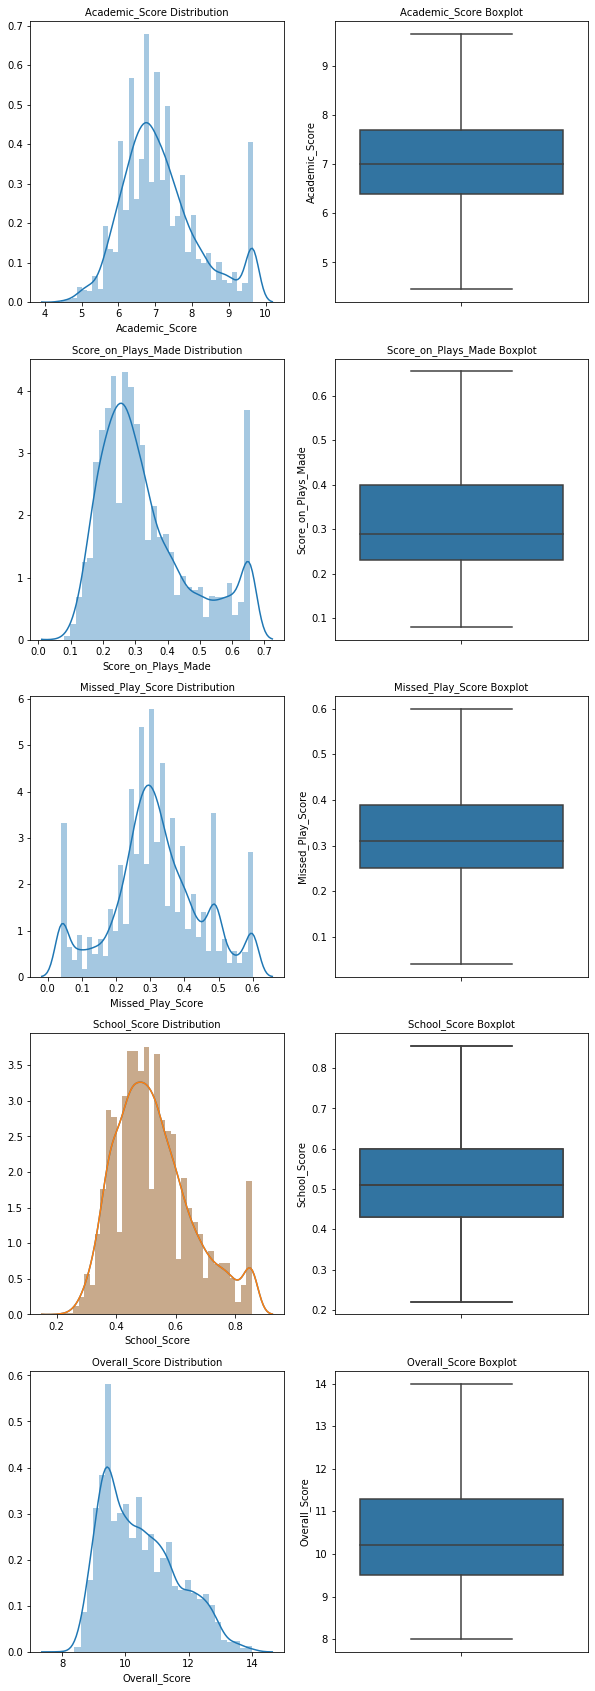

In [25]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10,30)


a = sns.distplot(df['Academic_Score'] , ax=axes[0][0])
a.set_title("Academic_Score Distribution",fontsize=10)

a = sns.boxplot(df['Academic_Score'] , orient = "v" , ax=axes[0][1])
a.set_title("Academic_Score Boxplot",fontsize=10)

a = sns.distplot(df['Score_on_Plays_Made'] , ax=axes[1][0])
a.set_title("Score_on_Plays_Made Distribution",fontsize=10)

a = sns.boxplot(df['Score_on_Plays_Made'] , orient = "v" , ax=axes[1][1])
a.set_title("Score_on_Plays_Made Boxplot",fontsize=10)

a = sns.distplot(df['Missed_Play_Score'] , ax=axes[2][0])
a.set_title("Missed_Play_Score Distribution",fontsize=10)

a = sns.boxplot(df['Missed_Play_Score'] , orient = "v" , ax=axes[2][1])
a.set_title("Missed_Play_Score Boxplot",fontsize=10)

a = sns.distplot(df['School_Score'] , ax=axes[3][0])
a.set_title("School_Score Distribution",fontsize=10)

a = sns.boxplot(df['School_Score'] , orient = "v" , ax=axes[3][1])
a.set_title("School_Score Boxplot",fontsize=10)

a = sns.distplot(df['School_Score'] , ax=axes[3][0])
a.set_title("School_Score Distribution",fontsize=10)

a = sns.boxplot(df['School_Score'] , orient = "v" , ax=axes[3][1])
a.set_title("School_Score Boxplot",fontsize=10)

a = sns.distplot(df['Overall_Score'] , ax=axes[4][0])
a.set_title("Overall_Score Distribution",fontsize=10)

a = sns.boxplot(df['Overall_Score'] , orient = "v" , ax=axes[4][1])
a.set_title("Overall_Score Boxplot",fontsize=10)

plt.show()

# Bivariate Analysis

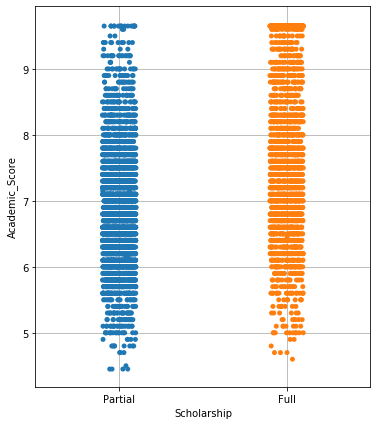

In [26]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Scholarship"], df['Academic_Score'], jitter=True)
plt.grid()
plt.show()

**Interpretation-** When Academic Scores are less than 5 the tendency to get a full scholarship is considerably less

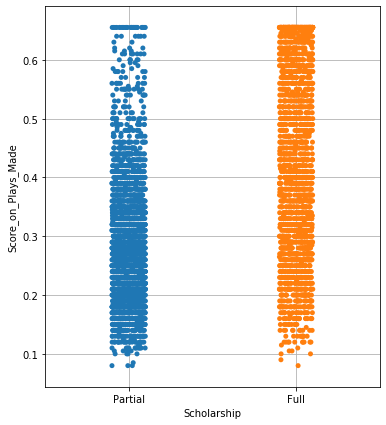

In [27]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Scholarship"], df['Score_on_Plays_Made'], jitter=True)
plt.grid()
plt.show()

**Interpretation-** The tendency to get a full scholarship is much higher among students where the Score on Plays made is in the range 0.5 - 0.6

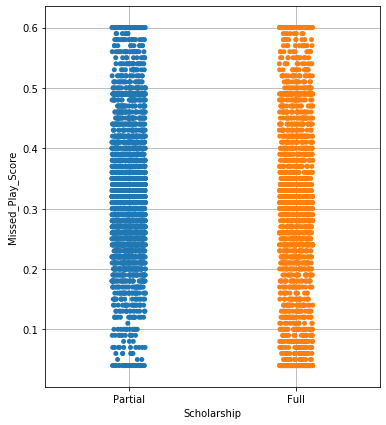

In [28]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Scholarship"], df['Missed_Play_Score'], jitter=True) 
plt.grid()
plt.show()

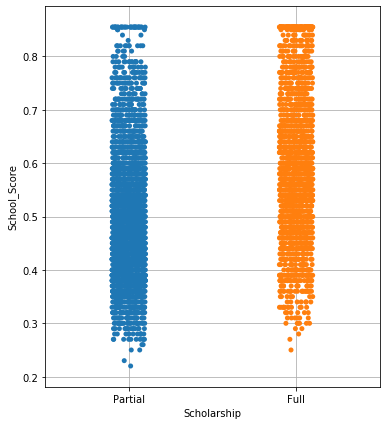

In [29]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Scholarship"], df['School_Score'], jitter=True) 
plt.grid()
plt.show()

**Interpretation -** Students with a school score of less than 0.3 have a lesser chance of getting full scholarship

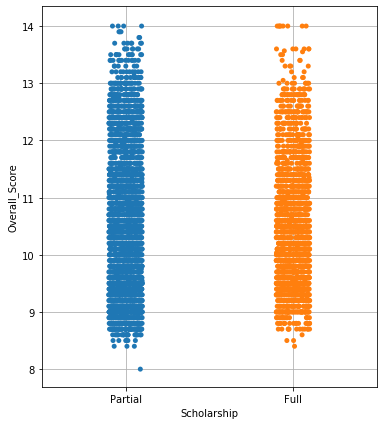

In [30]:
plt.figure(figsize=(6,7))
sns.stripplot(df["Scholarship"], df['Overall_Score'], jitter=True) 
plt.grid()
plt.show()

**Interpretation -**

**Label Encoding the Ordinal Variables**

In [31]:
df['Scholarship'] = df['Scholarship'].replace({'Partial' : 0 , 'Full' : 1 })

0    4028
1    2187
Name: Scholarship, dtype: int64
0    64.810941
1    35.189059
Name: Scholarship, dtype: float64




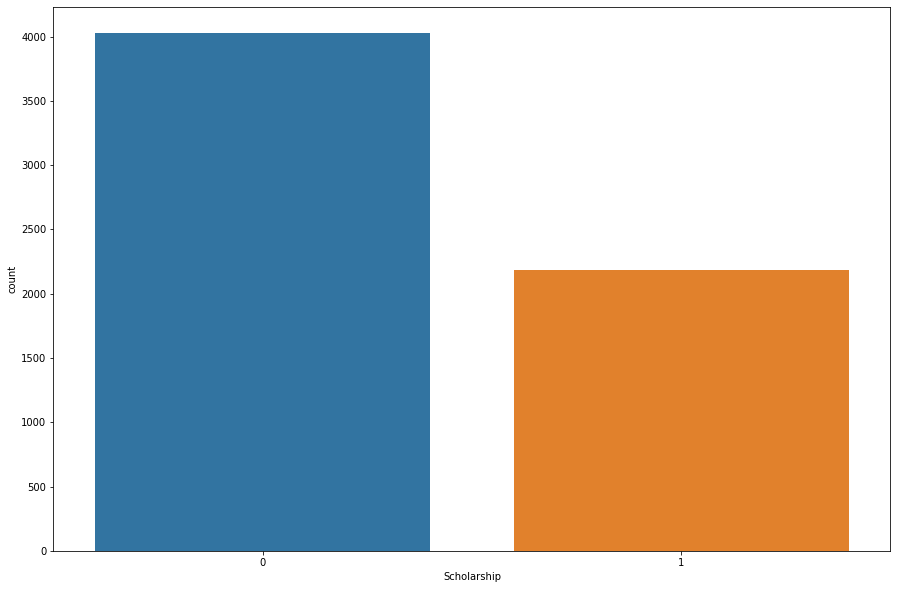

In [32]:
sns.countplot(df['Scholarship']);
print(df['Scholarship'].value_counts())
print(df['Scholarship'].value_counts(normalize=True)*100)
print('\n')

In [33]:
df.head(3)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,A,0.45,8.8,Eastern,0
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,0
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,0


In [34]:
columns=df.select_dtypes(include='object').columns
for i in columns:
    print('\n')
    print("----{}----".format(i))
    print(pd.DataFrame([df[i].value_counts(),round(df[i].value_counts()/df.shape[0]*100,2)],index=['Count','Percent']).T)
print('\n')



----Injury_Propensity----
           Count  Percent
Low       2650.0    42.64
Normal    1319.0    21.22
High      1181.0    19.00
Moderate  1065.0    17.14


----School_Type----
    Count  Percent
C  3384.0    54.45
B  1620.0    26.07
D  1042.0    16.77
A   169.0     2.72


----Region----
           Count  Percent
Eastern   2835.0    45.62
Western   1724.0    27.74
Southern  1656.0    26.65




In [35]:
df['Injury_Propensity'].unique()

array(['High', 'Low', 'Moderate', 'Normal'], dtype=object)

In [36]:
df['School_Type'].unique()

array(['A', 'C', 'B', 'D'], dtype=object)

In [37]:
df['Region'].unique()

array(['Eastern', 'Southern', 'Western'], dtype=object)

In [38]:
df.head(3)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,A,0.45,8.8,Eastern,0
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,0
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,0


In [39]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [40]:
df['Injury_Propensity'] = LE.fit_transform(df['Injury_Propensity'])
df.head(3)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,0,A,0.45,8.8,Eastern,0
1,6.3,0.30,0.34,1,C,0.49,9.5,Eastern,0
2,8.1,0.28,0.40,2,C,0.44,10.1,Eastern,0


In [41]:
df['Injury_Propensity'].unique()

array([0, 1, 2, 3], dtype=int64)

**Dummy Variables Encoding**

In [42]:
df_1 = pd.get_dummies(df, drop_first = True)
df_1.head(3)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Score,Overall_Score,Scholarship,School_Type_B,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,7.0,0.27,0.36,0,0.45,8.8,0,0,0,0,0,0
1,6.3,0.30,0.34,1,0.49,9.5,0,0,1,0,0,0
2,8.1,0.28,0.40,2,0.44,10.1,0,0,1,0,0,0


In [43]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 12 columns):
Academic_Score         6215 non-null float64
Score_on_Plays_Made    6215 non-null float64
Missed_Play_Score      6215 non-null float64
Injury_Propensity      6215 non-null int32
School_Score           6215 non-null float64
Overall_Score          6215 non-null float64
Scholarship            6215 non-null int64
School_Type_B          6215 non-null uint8
School_Type_C          6215 non-null uint8
School_Type_D          6215 non-null uint8
Region_Southern        6215 non-null uint8
Region_Western         6215 non-null uint8
dtypes: float64(5), int32(1), int64(1), uint8(5)
memory usage: 346.1 KB


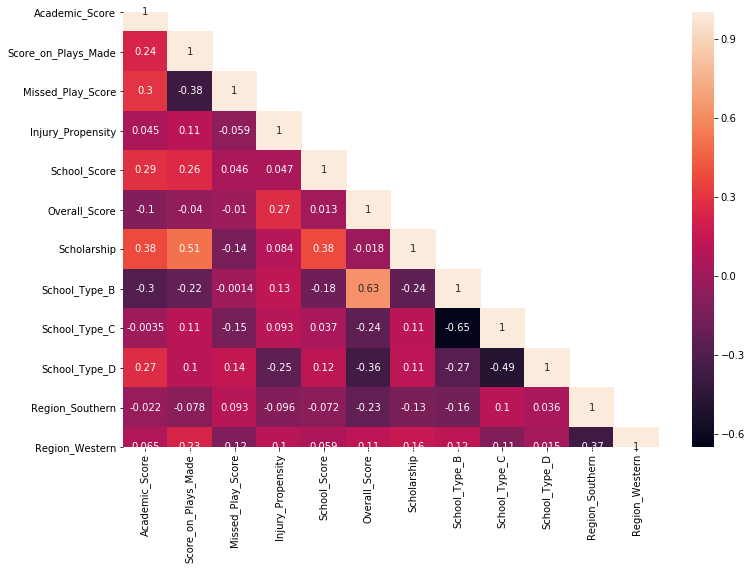

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(df_1.corr(), annot=True,mask=np.triu(df_1.corr(),+1));

School_Type_C and School_Type_B 

School_Type_D and School_Type_C

have high negative corelation

In [45]:
df_1.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score', 'Scholarship',
       'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern',
       'Region_Western'],
      dtype='object')

In [46]:
import statsmodels.formula.api as sm

Academic_Score + Score_on_Plays_Made + Missed_Play_Score + Injury_Propensity + School_Score + Overall_Score + School_Type_B + School_Type_C + School_Type_D + Region_Southern + Region_Western

# model_1  - including all  IV's

In [47]:
f_1 = 'Scholarship ~ Academic_Score + Score_on_Plays_Made + Missed_Play_Score + Injury_Propensity + School_Score + Overall_Score + School_Type_B + School_Type_C + School_Type_D + Region_Southern + Region_Western'

In [48]:
# defining the dependent and independent variables
Xtrain_1, ytrain_1 = df_1[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern',
       'Region_Western']], df_1[['Scholarship']]

In [49]:
model_1 = sm.logit(formula = f_1 , data = df_1).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.434318
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 6215
Model:                          Logit   Df Residuals:                     6203
Method:                           MLE   Df Model:                           11
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                  0.3304
Time:                        20:20:52   Log-Likelihood:                -2699.3
converged:                       True   LL-Null:                       -4031.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -10.9230      0.525    -20.808      0.000     -11.952      -9.894
Academic_Score          0.6449      0.040     15.962      0.000       0.566       0.724
Score_on_Plays_Made     6.1744      0.301     20.517      0.000       5.585       6.764
Missed_Play_Score      -1.9448      0.331     -5.881      0.000      -2.593      -1.297
Injury_Propensity       0.0330      0.036      0.917      0.359      -0.038       0.104
School_Score            4.4171      0.278     15.886      0.000       3.872       4.962
Overall_Score           0.1647      0.041      3.975      0.000       0.083       0.246
School_Type_B          -0.5016      0.271     -1.851      0.064      -1.033       0.029
School_Type_C           0.2983      0.237      1.259      0.208      -0.166       0.762
School_Type_D           0.3603      0.238      1.515      0.130      -0.106       0.827
Region_Southern        -0.4903      0.086     -5.720      0.000      -0.658      -0.322
Region_Western          0.1349      0.084      1.597      0.110      -0.031       0.300
=======================================================================================
"""

In [50]:
print('The pseudo r-square is calculated as 1-(Log-Likelihood/LL-Null) which gives us the result',1 - (model_1.llf/model_1.llnull),'\n''Same as what the model has given us:',model_1.prsquared)

The pseudo r-square is calculated as 1-(Log-Likelihood/LL-Null) which gives us the result 0.33038518196084055 
Same as what the model has given us: 0.33038518196084055


In [51]:
yhat_1 = model_1.predict(df_1[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score',
       'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern',
       'Region_Western']])

In [52]:
predicted_1 = list(map(round,yhat_1))
predicted_1[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [53]:
print('Accuracy Score of model_1 is' , accuracy_score(df_1[['Scholarship']],predicted_1))

Accuracy Score of model_1 is 0.8426387771520515


In [54]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [55]:
vif_cal(input_data=df_1[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern','Region_Western']])

Academic_Score  VIF =  1.55
Score_on_Plays_Made  VIF =  1.57
Missed_Play_Score  VIF =  1.51
Injury_Propensity  VIF =  1.15
School_Score  VIF =  1.18
Overall_Score  VIF =  2.05
School_Type_B  VIF =  10.68
School_Type_C  VIF =  10.61
School_Type_D  VIF =  6.08
Region_Southern  VIF =  1.22
Region_Western  VIF =  1.25


**Interpretation -** 
The VIF scores for both School_Type_B and School_Type_C are 10.68/10.61 plus the heat map shows high negative corelation among School_Type_C and School_Type_B and School_Type_D and School_Type_C.

**Pseudo R-squ. for model_1 is:	0.3304**

Will be creating the next model dropping two variables with the highest VIF which is well above the acceptable limits.


**Trial Model with duplicate records removed -** There is a reduction in the Pseudo R squared value and and increase in the VIF sofe of the IV.

# model_2 - Dropping the two variable (School_Type_B and School_Type_C)with the highest VIF scores in model_1

In [56]:
f_2 = 'Scholarship ~ Academic_Score + Score_on_Plays_Made + Missed_Play_Score + Injury_Propensity + School_Score + Overall_Score + School_Type_D + Region_Southern + Region_Western'

In [57]:
model_2 = sm.logit(formula = f_2 , data = df_1).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.438678
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 6215
Model:                          Logit   Df Residuals:                     6205
Method:                           MLE   Df Model:                            9
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                  0.3237
Time:                        20:20:52   Log-Likelihood:                -2726.4
converged:                       True   LL-Null:                       -4031.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.6810      0.447    -21.675      0.000     -10.556      -8.806
Academic_Score          0.7009      0.039     18.123      0.000       0.625       0.777
Score_on_Plays_Made     6.5046      0.297     21.903      0.000       5.923       7.087
Missed_Play_Score      -2.0546      0.327     -6.278      0.000      -2.696      -1.413
Injury_Propensity       0.0378      0.036      1.054      0.292      -0.032       0.108
School_Score            4.7123      0.272     17.304      0.000       4.179       5.246
Overall_Score          -0.0035      0.032     -0.110      0.913      -0.067       0.060
School_Type_D           0.0605      0.107      0.567      0.571      -0.149       0.270
Region_Southern        -0.4839      0.085     -5.674      0.000      -0.651      -0.317
Region_Western          0.0546      0.083      0.656      0.512      -0.109       0.218
=======================================================================================
"""

In [58]:
yhat_2 = model_2.predict(df_1[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score',  'School_Type_D', 'Region_Southern','Region_Western']])


In [59]:
predicted_2 = list(map(round,yhat_2))
predicted_2[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [60]:
print('Accuracy Score of model_2 is' , accuracy_score(df_1[['Scholarship']],predicted_2))

Accuracy Score of model_2 is 0.8394207562349155


In [61]:
vif_cal(input_data=df_1[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score',  'School_Type_D', 'Region_Southern','Region_Western']])

Academic_Score  VIF =  1.42
Score_on_Plays_Made  VIF =  1.52
Missed_Play_Score  VIF =  1.49
Injury_Propensity  VIF =  1.15
School_Score  VIF =  1.15
Overall_Score  VIF =  1.27
School_Type_D  VIF =  1.3
Region_Southern  VIF =  1.22
Region_Western  VIF =  1.23


**Pseudo R-squ. for model_2 :	0.3237**

The VIF for the IV's now are below 2 and well within the acceptable range.The r.eduction in Pseudo R-Squared values from model_1 to model_2 is 0.0067.

# model_3
# Removing predictor with high P value  (Overall_Score - 0.913,  School_Type_D	- 0.571 , Region_Western - 0.512, Injury_Propensity - 0.292)

In [62]:
f_3 = 'Scholarship ~ Academic_Score + Score_on_Plays_Made + Missed_Play_Score + School_Score + Region_Southern '

In [63]:
model_3 = sm.logit(formula = f_3 , data = df_1).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.438818
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 6215
Model:                          Logit   Df Residuals:                     6209
Method:                           MLE   Df Model:                            5
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                  0.3234
Time:                        20:20:53   Log-Likelihood:                -2727.3
converged:                       True   LL-Null:                       -4031.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -9.6960      0.288    -33.680      0.000     -10.260      -9.132
Academic_Score          0.7052      0.038     18.454      0.000       0.630       0.780
Score_on_Plays_Made     6.5719      0.292     22.539      0.000       6.000       7.143
Missed_Play_Score      -2.0450      0.324     -6.321      0.000      -2.679      -1.411
School_Score            4.7224      0.272     17.390      0.000       4.190       5.255
Region_Southern        -0.5076      0.078     -6.527      0.000      -0.660      -0.355
=======================================================================================
"""

The Pseudo R-squ.has reduced from 0.3237 in model_2 to 0.3234 in model_3.

In [64]:
yhat_3 = model_3.predict(df_1[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score','Region_Southern']])

In [65]:
predicted_3 = list(map(round,yhat_3))
predicted_3[:10]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [66]:
print('Accuracy Score of model_3 is' , accuracy_score(df_1[['Scholarship']],predicted_3))

Accuracy Score of model_3 is 0.8392598551890588


In [67]:
vif_cal(input_data=df_1[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score','Region_Southern']])

Academic_Score  VIF =  1.37
Score_on_Plays_Made  VIF =  1.46
Missed_Play_Score  VIF =  1.47
School_Score  VIF =  1.15
Region_Southern  VIF =  1.02


# Inference - 
model_1 gives us the best Pseudo R-squared value, however the IV's have very high VIF scores.

model_3 gives us a comparitively lower Pseudo R-squared value, the VIF scores for the IV's are well within the threshhold of 2 and also there P values are also .....

# Splitting the data into Train and Test

In [68]:
Train, Test = train_test_split(df_1,test_size=0.30,random_state = 1, stratify=df_1['Scholarship'])

In [69]:
Train.shape

(4350, 12)

In [70]:
Test.shape

(1865, 12)

In [71]:
Train['Scholarship'].value_counts(1)

0    0.648046
1    0.351954
Name: Scholarship, dtype: float64

In [72]:
Test['Scholarship'].value_counts(1)

0    0.648257
1    0.351743
Name: Scholarship, dtype: float64

In [73]:
LR = LogisticRegression(solver='newton-cg')

# model_4 - all IV's

In [74]:
df_1.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'Injury_Propensity', 'School_Score', 'Overall_Score', 'Scholarship',
       'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern',
       'Region_Western'],
      dtype='object')

## Fitting the model on Training Data and checking Train Accuracy

In [75]:
logistic_1 = LR.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern','Region_Western']], Train['Scholarship'])

In [76]:
print('Train Accuracy Score of model_4:', logistic_1.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern','Region_Western']], Train['Scholarship']))

Train Accuracy Score of model_4: 0.8416091954022988


## Predicting the classes and the probabilities on the Test Data

In [77]:
logistic_1_test_class =logistic_1.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern','Region_Western']])
logistic_1_test_probabilities =logistic_1.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern','Region_Western']])

## model_5 - dropping (School_Type_B and School_Type_C)

In [78]:
logistic_2 = LR.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_D', 'Region_Southern','Region_Western']], Train['Scholarship'])

In [79]:
print('Train Accuracy Score of model_5:', logistic_2.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score','School_Type_D', 'Region_Southern','Region_Western']], Train['Scholarship']))

Train Accuracy Score of model_5: 0.8354022988505747


In [80]:
logistic_2_test_class =logistic_2.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_D', 'Region_Southern','Region_Western']])
logistic_2_test_probabilities =logistic_2.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_D', 'Region_Southern','Region_Western']])

## model_6 - Removing predictor with high P value (Overall_Score - 0.913, School_Type_D - 0.571 , Region_Western - 0.512, Injury_Propensity - 0.292)¶

In [81]:
logistic_3 = LR.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score', 'School_Score','Region_Southern']], Train['Scholarship'])

In [82]:
print('Train Accuracy Score of model_6:', logistic_3.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score', 'School_Score','Region_Southern']], Train['Scholarship']))

Train Accuracy Score of model_6: 0.8367816091954023


In [83]:
logistic_3_test_class =logistic_3.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Region_Southern',]])
logistic_3_test_probabilities =logistic_3.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score','Region_Southern']])

# Confusion Matrix for Logistic Regression models (4-6)

In [84]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

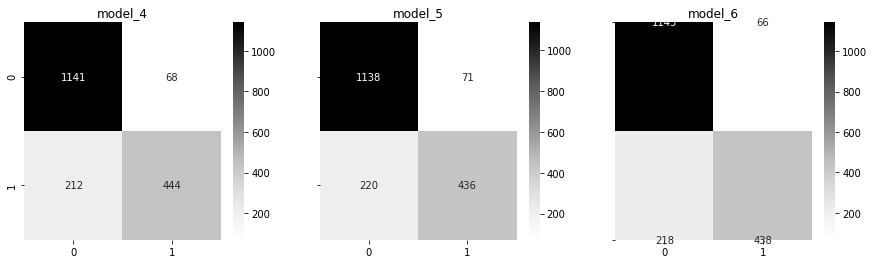

In [85]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],logistic_1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('model_4')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],logistic_2_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('model_5');

plot_2 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],logistic_3_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('model_6');



In [86]:
print('model_4')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],logistic_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('model_5')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],logistic_2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('model_6')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],logistic_3_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')


model_4
True Negative: 1141 
False Positives: 68 
False Negatives: 212 
True Positives: 444 


model_5
True Negative: 1138 
False Positives: 71 
False Negatives: 220 
True Positives: 436 


model_6
True Negative: 1143 
False Positives: 66 
False Negatives: 218 
True Positives: 438 




In [87]:
print('model_4')
print(metrics.classification_report(Test['Scholarship'],logistic_1_test_class),'\n')

print('model_5')
print(metrics.classification_report(Test['Scholarship'],logistic_2_test_class),'\n')

print('model_6')
print(metrics.classification_report(Test['Scholarship'],logistic_3_test_class),'\n')


model_4
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1209
           1       0.87      0.68      0.76       656

    accuracy                           0.85      1865
   macro avg       0.86      0.81      0.83      1865
weighted avg       0.85      0.85      0.84      1865
 

model_5
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1209
           1       0.86      0.66      0.75       656

    accuracy                           0.84      1865
   macro avg       0.85      0.80      0.82      1865
weighted avg       0.85      0.84      0.84      1865
 

model_6
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1209
           1       0.87      0.67      0.76       656

    accuracy                           0.85      1865
   macro avg       0.85      0.81      0.82      1865
weighted avg       0.85      0.85      0.84   

# AUC and ROC Curve for Logistic Model (4-6)

In [88]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

model_4 AUC: 0.82977


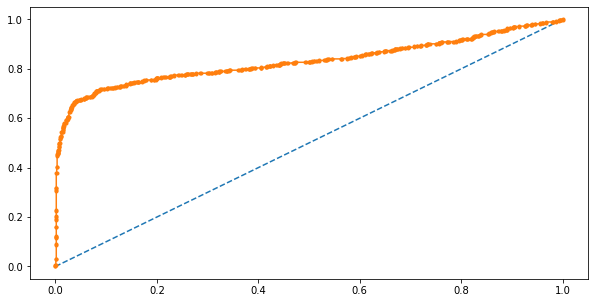

model_5 AUC: 0.82617


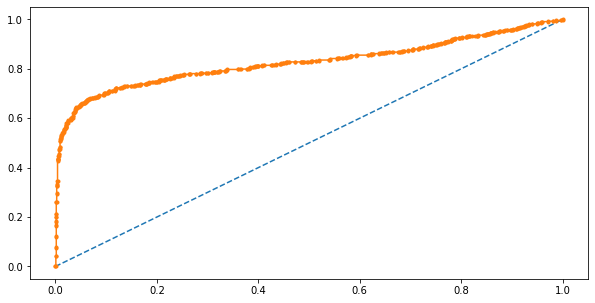

model_6 AUC: 0.82691


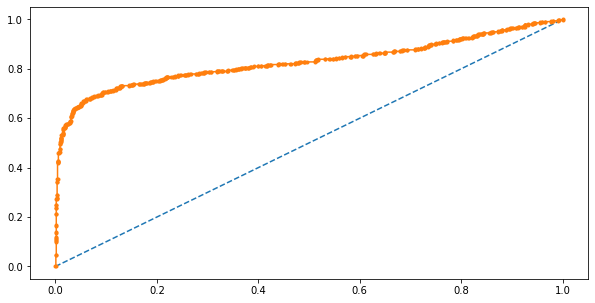

In [89]:
# AUC and ROC for the model_4

# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],logistic_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('model_4 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],logistic_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model_5

# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],logistic_2_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('model_5 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],logistic_2_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model_6

# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],logistic_3_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('model_6 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],logistic_3_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# Linear Discriminant Analysis

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [91]:
LDA = LinearDiscriminantAnalysis()

# model_7_LDA

In [92]:
model_7_LDA = LDA.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern','Region_Western']], Train['Scholarship'])

In [93]:
print('Train Accuracy Score of LDA model_7 :', model_7_LDA.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern','Region_Western']], Train['Scholarship']))

Train Accuracy Score of LDA model_7 : 0.8413793103448276


In [94]:

model_7_LDA_test_class = model_7_LDA.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern','Region_Western']])
model_7_LDA_test_probabilities = model_7_LDA.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern','Region_Western']])

# model_8_LDA

In [95]:
model_8_LDA = LDA.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_D', 'Region_Southern','Region_Western']], Train['Scholarship'])

In [96]:
print('Train Accuracy Score of LDA model_8 :', model_8_LDA.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_D', 'Region_Southern','Region_Western']], Train['Scholarship']))

Train Accuracy Score of LDA model_8 : 0.8379310344827586


In [97]:

model_8_LDA_test_class = model_8_LDA.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score', 'School_Type_D', 'Region_Southern','Region_Western']])
model_8_LDA_test_probabilities = model_8_LDA.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','Injury_Propensity', 'School_Score', 'Overall_Score','School_Type_D', 'Region_Southern','Region_Western']])

# model_9_LDA Removing predictor with high P value (Overall_Score - 0.913, School_Type_D - 0.571 , Region_Western - 0.512, Injury_Propensity - 0.292)¶¶

In [98]:
model_9_LDA = LDA.fit(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score', 'School_Score','Region_Southern']], Train['Scholarship'])

In [99]:
print('Train Accuracy Score of LDA model_9 :', model_9_LDA.score(Train[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score', 'School_Score', 'Region_Southern']], Train['Scholarship']))

Train Accuracy Score of LDA model_9 : 0.837471264367816


In [100]:

model_9_LDA_test_class = model_9_LDA.predict(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Region_Southern']])
model_9_LDA_test_probabilities = model_9_LDA.predict_proba(Test[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score', 'School_Score', 'Region_Southern']])

# Confusion Matrix for LDA models (7-9)

In [101]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

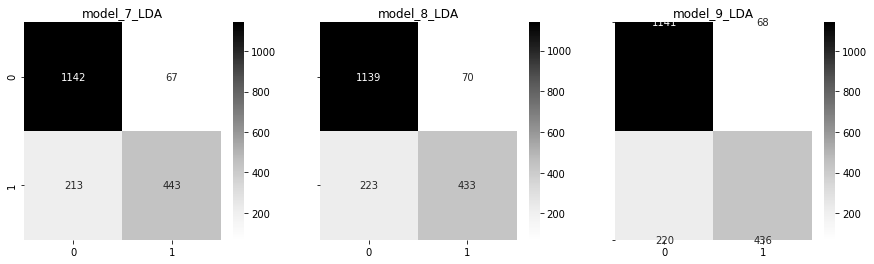

In [102]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_7_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('model_7_LDA')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_8_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('model_8_LDA');

plot_2 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_9_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('model_9_LDA');



In [103]:
print('model_7_LDA')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_7_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('model_8_LDA')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_8_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('model_9_LDA')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_9_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')


model_7_LDA
True Negative: 1142 
False Positives: 67 
False Negatives: 213 
True Positives: 443 


model_8_LDA
True Negative: 1139 
False Positives: 70 
False Negatives: 223 
True Positives: 433 


model_9_LDA
True Negative: 1141 
False Positives: 68 
False Negatives: 220 
True Positives: 436 




# Classification Report for LDA models (7-9)

In [104]:
print('model_7_LDA')
print(metrics.classification_report(Test['Scholarship'],model_7_LDA_test_class),'\n')

print('model_8_LDA')
print(metrics.classification_report(Test['Scholarship'],model_8_LDA_test_class),'\n')

print('model_9_LDA')
print(metrics.classification_report(Test['Scholarship'],model_9_LDA_test_class),'\n')


model_7_LDA
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1209
           1       0.87      0.68      0.76       656

    accuracy                           0.85      1865
   macro avg       0.86      0.81      0.83      1865
weighted avg       0.85      0.85      0.84      1865
 

model_8_LDA
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1209
           1       0.86      0.66      0.75       656

    accuracy                           0.84      1865
   macro avg       0.85      0.80      0.82      1865
weighted avg       0.84      0.84      0.84      1865
 

model_9_LDA
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1209
           1       0.87      0.66      0.75       656

    accuracy                           0.85      1865
   macro avg       0.85      0.80      0.82      1865
weighted avg       0.85      0.85 

# AUC ROC for LDA models (7-9)

model_7_LDA AUC: 0.82982


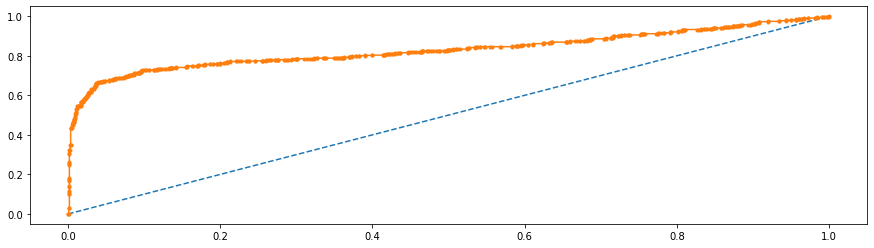

model_8_LDA AUC: 0.82684


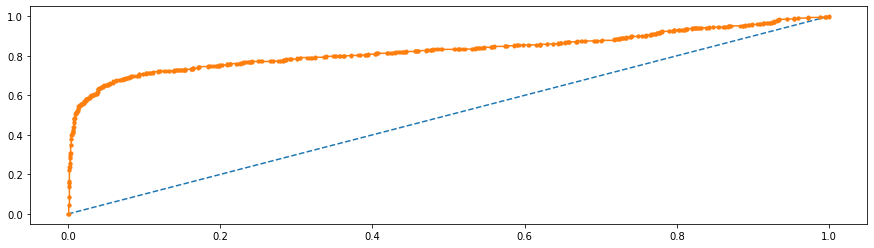

model_9_LDA AUC: 0.82743


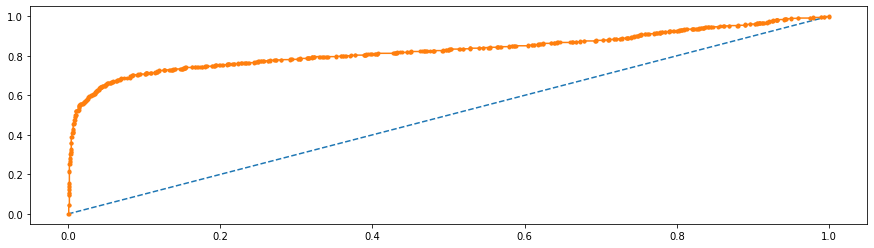

In [105]:
# AUC and ROC for model_7_LDA

# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_7_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('model_7_LDA AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_7_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for model_8_LDA

# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_8_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('model_8_LDA AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_8_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for model_9_LDA

# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_9_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('model_9_LDA AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_9_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()
